In [1]:
%%html
<style>
.container{width:100%}
</style>

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import interpolate
%matplotlib inline

In [3]:
def Explicit(K, S_max, S0, T, sigma, r, N, M):
    def payoff(K, x):
        temp = np.zeros(x.shape)
        temp = np.stack((K-x, temp), axis = 1)
        return np.max(temp, axis=1)
    
    h = S_max/(M+1)
    delta_t = T/N
    x = np.arange(M+2) * h
    x = x[:-1]
    t = np.arange(N+1) * delta_t
    
    x2 = x ** 2
    sigma2 = sigma * sigma
    h2 = h * h
    
    a = -sigma2 * x2 /(2 * h2)
    b = sigma2 * x2 / h2 + r*x/h+r
    c = -sigma2*x2/(2*h2)-r*x/h
    
    A = np.diag(b)
    for i in range(1, M+1):
        A[i, i-1] = a[i]
    for i in range(M):
        A[i, i+1] = c[i]
    
    phy = payoff(K, x)
    P = phy
    
    for i in range(1, N):
        P_temp = P - delta_t * A @ P
        temp = np.stack((P_temp, phy), axis = 1)
        P = np.max(temp, axis=1)
        
    f=interpolate.interp1d(x,P,kind="cubic")
    print(f(S0))
    return x, P

In [4]:
def Explicit_plot_help(x, P, M, filename):
    plt.figure(figsize=(9,6))
    plt.title("Explicit Euler Method, M={}".format(M))
    plt.plot(x, P)
    plt.xlabel('S')
    plt.ylabel('Option price at time 0')
    f=interpolate.interp1d(x,P,kind="cubic")
    plt.scatter(S0, f(S0), c = 'r')
    plt.savefig(filename + '.jpg')
    plt.show()

In [5]:
# K = 100
# S_max = 200
# T = 1
# sigma = 0.2
# r = 0.1
# S0 = 100
# N = 20
# M = [20, 50]
# for m in M:
#     xx, Price = Explicit(K, S_max, S0, T, sigma, r, N, m)
#     plt.plot(xx, Price)
# plt.legend(M)
# plt.show()

6.373087083148276


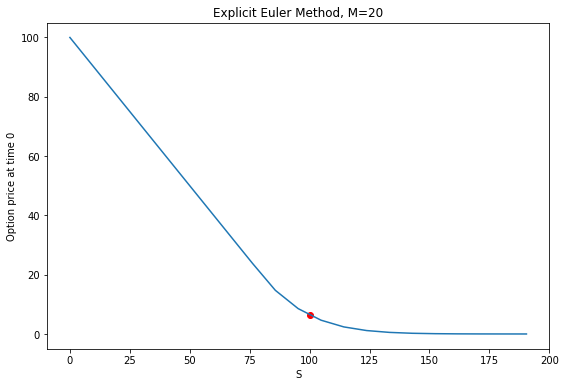

In [6]:
K = 100
S_max = 200
T = 1
sigma = 0.2
r = 0.05
S0 = 100
N = 20
M = 20
xx, Price = Explicit(K, S_max, S0, T, sigma, r, N, M)
Explicit_plot_help(xx, Price, M, 'Explicit_M20')

1668.2727266777824


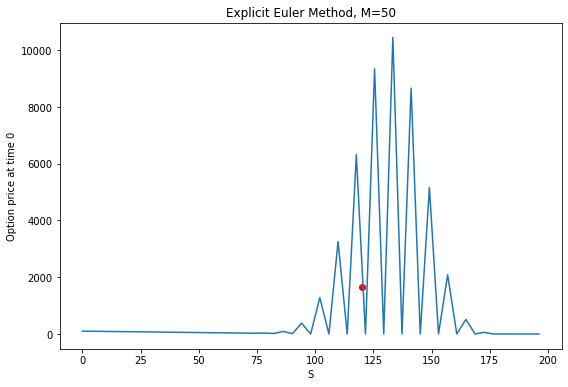

In [7]:
K = 100
S_max = 200
T = 1
sigma = 0.2
r = 0.1
S0 = 120
N = 20
M = 50
xx, Price = Explicit(K, S_max, S0, T, sigma, r, N, M)
Explicit_plot_help(xx, Price, M, 'Explicit_M50')